# Tutorial 1 - Initializing an Experiment

In [1]:
from IPython import display

In [2]:
import packerlabimaging as pkg

No module named 'cellpose'
cannot use anatomical mode, but otherwise suite2p will run normally


This notebook demonstrates a basic workflow of using the packerlabimaging package. 

The fundamental types of imaging trials accepted for this workflow are: 
 - 2photon imaging
 - All Optical Experiment (2photon imaging + optogenetic stimulation)
 - Suite2p processing results output

This tutorial is based off an existing 2photon experiment that includes various trials of 2photon imaging and All optical experiments:

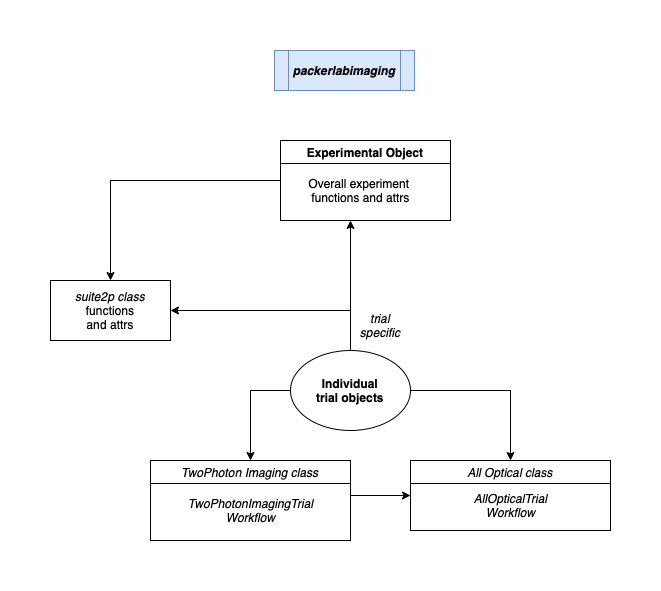

In [3]:
display.Image("/home/pshah/Documents/code/packerlabimaging/Notebooks/files/Overall Package Flow Diagram.drawio.png")

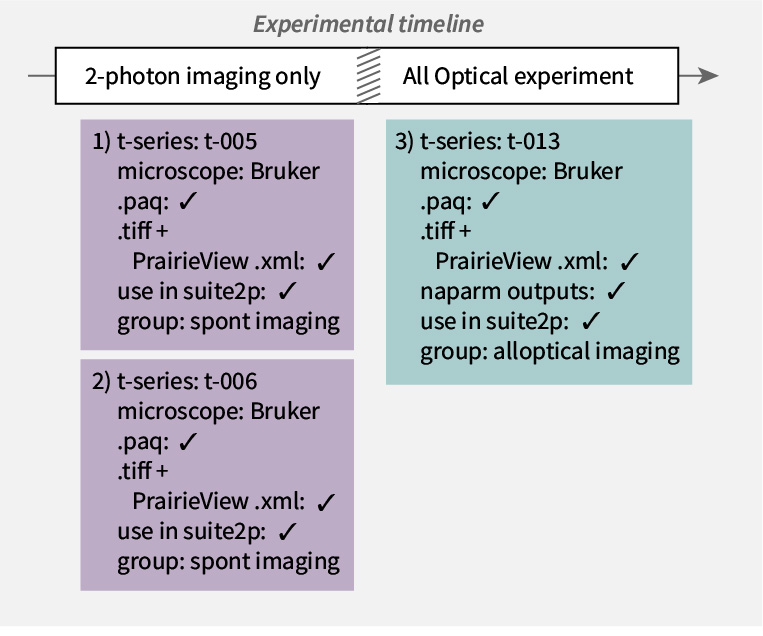

In [4]:
display.Image("/home/pshah/Documents/code/packerlabimaging/files/packerlabimaging-tutorial-exp-outline.jpg")

The first step towards starting the analysis pipeline and creating the `Experiment` object is to create a dictionary (`initialization_dict`) to collect the metadata fields required for initializing `Experiment`. In `initialization_dict`, we provide information from the experiment. 

Also, we pre-load existing suite2p results for this experiment by providing a valid path to `s2pResultsPath`. It is also possible to create `Experiment` without pre-loading suite2p results, by simply providing True to `useSuite2p`.



In [5]:
initialization_dict = {
    'dataPath': '/home/pshah/mnt/qnap/Data/2020-12-19',
    'analysisSavePath': '/home/pshah/Documents/code/packerlabimaging/tests/',
    'microscope': "Bruker",
    "expID": 'RL109',
    'date': '2020-12-19',
    'comments': 'testing out analysis workflow',
    'trialsInformation': {},  # NOTE: this dictionary is populated in the code cells below.
    'useSuite2p': True,
    's2pResultsPath': "/home/pshah/mnt/qnap/Analysis/2020-12-19/suite2p/alloptical-2p-1x-alltrials/plane0"
}


Collect information regarding each trial, and add to `initialization_dict['trialsInformation']` for each individual imaging t-series. Here we start with the two 2-photon imaging only t-series:

In [6]:
# add information about each trial in experiment to trialsInformation field of the initialization_dict
trials_list_spont = ['t-005', 't-006']
for idx, trial in enumerate(trials_list_spont):
    data_path_base = '/home/pshah/mnt/qnap/Data/2020-12-19'
    animal_prep = initialization_dict['expID']
    date = data_path_base[-10:]

    ## everything below should autopopulate and run automatically
    paqs_loc = '%s/%s_%s_%s.paq' % (data_path_base, date, animal_prep, trial[2:])  # path to the .paq files for the selected trials
    tiffs_loc = f'{data_path_base}/{date}_{trial}/{date}_{trial}_Cycle00001_Ch3.tif'


    initialization_dict["trialsInformation"][trial] = {'trialType': 'TwoPhotonImagingTrial',
                                       'tiff_path': f"{tiffs_loc}",
                                       's2p_use': True,
                                       'expGroup': "pre 4ap 2p spont imaging",
                                       'paq_path': paqs_loc
                                                       }


Next, we add the single All Optical experiment t-series to the same `trialsInformation` dictionary in a similar manner. As with the 2-photon imaging only trials, it is possible to add multiple All Optical experiment t-series, where each t-series is associated with a unique set of .paq, .tiff, and naparm output files.

In [7]:
trials_list_alloptical = ['t-013']
naparm_paths = {'t-013': '/home/pshah/mnt/qnap/Data/2020-12-19/photostim/2020-12-19_RL109_ps_014/'}
for idx, trial in enumerate(trials_list_alloptical):
    data_path_base = '/home/pshah/mnt/qnap/Data/2020-12-19'
    animal_prep = initialization_dict['expID']
    date = data_path_base[-10:]

    ## everything below should autopopulate and run automatically
    paqs_loc = '%s/%s_%s_%s.paq' % (data_path_base, date, animal_prep, trial[2:])  # path to the .paq files for the selected trials
    tiffs_loc = f'{data_path_base}/{date}_{trial}/{date}_{trial}_Cycle00001_Ch3.tif'


    initialization_dict["trialsInformation"][trial] = {'trialType': 'AllOpticalTrial',
                                        'tiff_path': f"{tiffs_loc}",
                                        's2p_use': True,
                                        'expGroup': "pre 4ap 2p all optical",
                                        'paq_path': paqs_loc,
                                        'naparm_path': naparm_paths[trial]
                                                        }

In [8]:
expobj = pkg.Experiment(**initialization_dict)

CREATING new Experiment: 
	Packerlabimaging Experiment object (date: 2020-12-19, expID: RL109)
\- ADDING Suite2p Results to Experiment object ... 
Loading 640 traces labelled as cells
Subtracting neuropil with a coefficient of 0.7
|- Loaded [640] suite2p classified cells from plane 0, recorded for 8533.93 secs total


\- PROCESSING trial: t-005, expID: (RL109)
\----- CREATING TwoPhotonImagingTrial for trial: t-005,  RL109 t-005
saving new trial object to: /home/pshah/Documents/code/packerlabimaging/tests/2020-12-19_t-005.pkl

	 -- data object saved to /home/pshah/Documents/code/packerlabimaging/tests/2020-12-19_t-005.pkl -- 

\----- Parsing PV Metadata for Bruker microscope...
	n planes: 1 
	n frames: 14880 
	fps: 29.75971618277715 
	frame size (px): 512 x 512 
	zoom: 1.0 
	pixel size (um): 2.18458479264539 2.18458479264539 
	scan centre (V): 0.0 0.0

\----- Processing paq file ...
	loading paq data from: /home/pshah/mnt/qnap/Data/2020-12-19/2020-12-19_RL109_005.paq
	|- loaded 8 channe

In [9]:
print(expobj)

Experiment object (last saved: Tue Jan 18 16:01:28 2022), date: 2020-12-19, expID: RL109, microscope: Bruker
pkl path: /home/pshah/Documents/code/packerlabimaging/tests/RL109_analysis.pkl
trials in Experiment object:
	t-005: TwoPhotonImagingTrial, pre 4ap 2p spont imaging
	t-006: TwoPhotonImagingTrial, pre 4ap 2p spont imaging
	t-013: AllOpticalTrial, pre 4ap 2p all optical

